<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="https://qworld.net" target="_blank"><img src="../images/qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by Berat Yenilen, Utku Birkan, Arda Çınar, Cenk Tüysüz and Özlem Salehi (<a href="https://qworld.net/qturkey/" target="_blank">QTurkey</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>

$ \renewcommand{\bra}[1]{\langle #1|} $
$ \renewcommand{\ket}[1]{|#1\rangle} $
$ \renewcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \renewcommand{\dot}[2]{ #1 \cdot #2} $
$ \renewcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \renewcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \renewcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \renewcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \renewcommand{\mypar}[1]{\left( #1 \right)} $
$ \renewcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \renewcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \renewcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \renewcommand{\onehalf}{\frac{1}{2}} $
$ \renewcommand{\donehalf}{\dfrac{1}{2}} $
$ \renewcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \renewcommand{\vzero}{\myvector{1\\0}} $
$ \renewcommand{\vone}{\myvector{0\\1}} $
$ \renewcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \renewcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \renewcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \renewcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \renewcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \renewcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \renewcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \renewcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \renewcommand{\pstate}[1]{ \lceil  #1  \rfloor } $

<h1> Bernstein-Vazirani Algorithm </h1>

Let $x \cdot s$ represent the inner product of the bit strings modulo 2. 

For instance if $x = 1000$ and $s = 1010$, then $x\cdot s = 1.1 + 0.0 + 0.1 + 0.0 = 1 \pmod 2 = 1$

## Problem

Given an oracle function $f:\{0,1\}^n \rightarrow \{0,1\}$, which is defined as $ f(\mathbf{x}) = x \cdot s $, find the secret string (sequence of bits) $s$.


This might come across as a bit of an artificially created problem, because it is. It was specifically designed to be solved using a quantum computer in order to show there can be advantages in using quantum algorithms over probabilistic algorithms.

Let's start by giving an example of such an $f$.

\begin{align*}
	f(00)&=0\\
	f(01)&=1\\
	f(10)&=0\\
	f(11)&=1\\
	\end{align*}
    
In this example, $s$ is $01$, as $f(00)=00\cdot 01=0$, $f(01)=01\cdot 01 = 1$, $f(10)=10\cdot01=0$ and $f(11)=11\cdot01=1$.
    
  

Note that now the unitary operator $U_f$ takes the following form: $ U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus ( x \cdot s)} $. 



### Task 1

- Using how many queries can you solve the problem clasically? How many queries if you use a probabilistic algorithm?
- How many queries do you think we need to make if we are to solve the problem with a quantum computer? 

<a href="A05_Bernstein_Vazirani_Algorithm_Solutions.ipynb#task1">click for our solution</a>

### Task 2

What can we say about the $f:\{0,1\}^n \rightarrow \{0,1\}$ function if $s = 0^n$?

<a href="A05_Bernstein_Vazirani_Algorithm_Solutions.ipynb#task2">click for our solution</a>

f(x) = 0 for all x

## Algorithm

We use exactly the same algorithm as Deutsch-Jozsa.

 <img src="../images/deutschjozsa.png" width="60%" align="center">

We construct a circuit with $n+1$ qubits. 

- Set the $n+1$'st qubit to state $\ket{-}$ by applying $X$ and $H$ gates.
- Apply $H$ to first $n$ qubits.
- Apply $U_f$.
- Apply $H$ to first $n$ qubits.
- Measure the first $n$ qubits to obtain $s$.

## Analysis

 <img src="../images/deutschjozsa2.png" width="60%" align="center">
 
As we have the same circuit as Deustch-Jozsa, the initialization is the same,

$$ \ket{\psi_2} = \frac{1}{\sqrt{2^n}}\sum_{x \in \{0,1\}^n} \ket{x} \otimes \ket{-}.$$

From now on we can ignore the output qubit and focus on our input qubits. After applying $U_f$ we then get the state

$$ \ket{\psi_{3,0}}= \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} (-1)^{f(x)} \ket{x}.$$

Let's replace $f(x) = x \cdot s$, and rewrite our state as

$$ \ket{\psi_{3,0}} = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} (-1)^{x \cdot s} \ket{x}.$$

From the previous notebook we know that 
$$ H^{\otimes n} \ket{x} = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} (-1)^{x \cdot z} \ket{z}. $$

We also know that the $H^{\otimes n}$ operator is its own inverse. Thus, we can say that $H^{\otimes n}\ket{a} = \ket{b} \Longleftrightarrow H^{\otimes n}\ket{b} = \ket{a}$. So in fact, $\ket{\psi_3}$ is the state obtained after applying $H^{\otimes n}$ to $\ket{s}$.

Hence after applying $H^{\otimes n}$ to the input qubits, we get the final state as 

$$\ket{\psi_{4,0}} = \ket{s}.$$ 

We measure the first $n$ qubits and we observe the string $s$ with probability 1.

Note that this is also an exact algorithm without any errors like the other algorithms we have seen so far.

### Task 3

Given an oracle function `bv_oracle()` that constructs a 6 qubit oracle circuit ($s$ has length 5) for $f$, construct a circuit that implements the algorithm described above to find out $s$.

Note that qubit 5 is the output qubit.

Run the following cell to load function `bv_oracle()`.

In [1]:
%run ../include/oracle.py

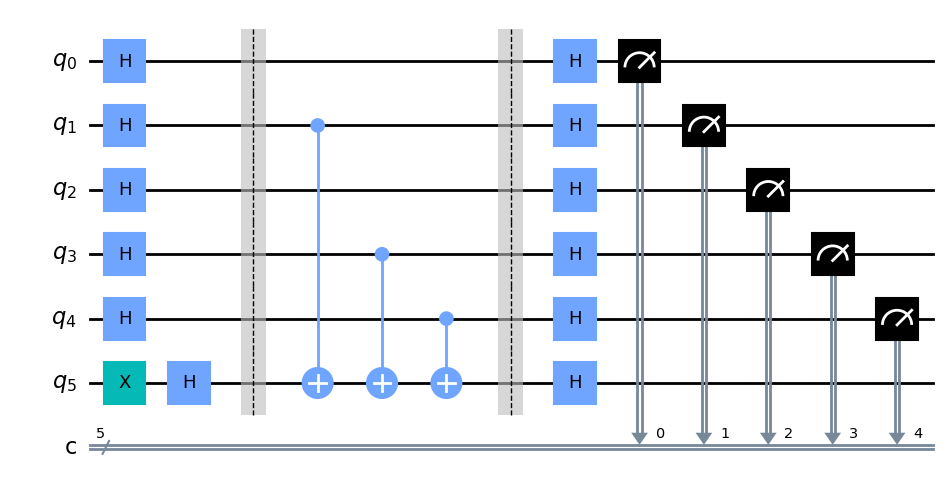

In [2]:
from qiskit import QuantumCircuit, execute, Aer

n=5  

#Create quantum circuit
bv_circuit = QuantumCircuit(n+1, n)

#Your code here
bv_circuit.x(n)
bv_circuit.h(range(n+1))

bv_circuit.compose(bv_oracle(), inplace=True)

bv_circuit.h(range(n+1))

bv_circuit.measure(range(n),range(n))


bv_circuit.draw(output="mpl")

In [3]:
job = execute(bv_circuit, Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts()
print(counts)

{'11010': 10000}


<a href="A05_Bernstein_Vazirani_Algorithm_Solutions.ipynb#task3">click for our solution</a>

### Task 4

Given $\textbf{s} = 0110$, implement a function that returns an oracle for the function  $ f(\mathbf{x}) = \mathbf{x} \cdot \mathbf{s} $. Note that $n=4$ and you will need a cirucit with 5 qubits where qubit 4 is the output qubit.

In [5]:
from qiskit import QuantumCircuit

def oracle():
    
    #Your code here
    circuit = QuantumCircuit(5)
    circuit.barrier()

    circuit.cx(1, 4)
    circuit.cx(2, 4)

    circuit.barrier()
    return barrier

<a href="A05_Bernstein_Vazirani_Algorithm_Solutions.ipynb#task4">click for our solution</a>

Recall from Task 1 that we need at least $n$ queries both using the deterministic and probabilistic approaches. Now finally, we have an algorithm which provides speedup in the query model also against probabilistic algorithms, although not exponential.